<span style="font-family:Lucida Bright;">
<p style="margin-bottom:0.5cm"></p>
<center>
<font size="8"><b>Deep Learning, Fall 2021</b></font>
<p style="margin-bottom:0.6cm"></p>
<font size="3"><b>Final Project:</b></font>
<p style="margin-bottom:0.6cm"></p>
<font size="5"><b>Enhancing Voices for Better Speech Intelligibility</b></font>
<p style="margin-bottom:2cm"></p>
<font size="6"><b>Start</b></font>
</center>
<p style="margin-bottom:2cm"></p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#How-to-get-the-most-out-of-this-notebook" data-toc-modified-id="How-to-get-the-most-out-of-this-notebook-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>How to get the most out of this notebook</a></span></li><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prerequisites</a></span></li><li><span><a href="#Links-and-resources" data-toc-modified-id="Links-and-resources-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Links and resources</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#TIMIT-dataset" data-toc-modified-id="TIMIT-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>TIMIT dataset</a></span></li><li><span><a href="#Synthetic-speech-dataset" data-toc-modified-id="Synthetic-speech-dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Synthetic speech dataset</a></span></li></ul></li></ul></li></ul></div>

# Introduction

Many people struggle to understand speech in challenging acoustic environments, such as noisy bar. Therefore, enhancing the intelligibility of noisy speech signals is one of the key challenges for any producer of modern communication devices.

The problem is often tackled by dividing a noisy speech signal into a number of frequency bands and attenuating the ones where the signal-to-noise ratio is insufficient. This approach, while effective in some situations, often leads to poor results, and sometimes even exacerbates the problem it is trying to solve as the constant activation and disactivation of some of the frequency bands in response to the fluctuations in speech and noise can create a very unnatural and disturbing sounds.

In this project, we will try a different approach and attempt to create a deep learning model that will produce an equalization curve that can be applied to the noisy speech signal in order to maximize its intelligibility. This will be done by running a clear speech signal through a model of human auditory processing of and searching for a combination of parameters that produce a frequency-gain curve that, when applied to the noisy signal, creates the output most similar to that of clear speech.

## Official project description

In the info-doc for the Deep Learning course, the project is described as follows:

> **Designing self-driving earbuds with [augmentedhearing.io](augmentedhearing.io) which enhance voices based on function correlated with speech intelligibility**
>
> As one in four adults struggle to understand speech in challenging acoustics we aim to train consumer earbuds to enhance voices through back propagation using DHASP model implemented using [PyTorch differentiation package](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) validated on [TIMIT speech dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3) based on an objective function correlated with [HASPI speech intelligibility auditory processing model](https://www.sciencedirect.com/science/article/pii/S0167639320300431) available in Matlab.

## The approach

The time scope for the course is normed to 7 days of 9 hours, which amounts to 63 hours. The outcome should be documented in a report formatted as a [conference paper](https://drive.google.com/file/d/0BxJRy96AHCJxaUEwOFhwUExmX00/view?usp=sharing&resourcekey=0-RvwJqDVrZVijbkkifLWoYA), as well as a Jupyter notebook that ideally should recreate the main results of the report.

At the beginning of the project, the following resources were available:

1. speech data: a TIMIT dataset consisting of 10 sentences spoken by 630 speakers from 8 major dialect regions of the United States
2. an [article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) describing a proposal for a differentiable objective function that can be used to train a neural network. The function is a measure of similarity of a [cepstrum](https://en.wikipedia.org/wiki/Cepstrum) of a given speech signal to the cepstrum of the target signal (usually clear, noisless speech)
3. Matlab code for calculating the [HASPI speech intelligibility index] that can be used to evaluate the results.

In turn, to create a our model, we need the following:

1. clear speech audio data to use as the target for model
2. the corresponding noisy speech audio data to train the model
3. a PyTorch implementation of the equalization filter that can be applied to the noisy speech signal. Our model will optimize the parameters of this filter to maximize speech intelligibility
4. a working PyTorch implementation of the objective function proposed in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571).

Therefore, before we could start creating and tweaking our neural network, we needed to obtain the prerequisites 2 - 4, of which especially number 4: implementation of the objective function proposed in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) was, as I will demonstrate later, all but straightforward.

To obtain a fully functional model would require going through and understanding the project literature, obtaining the prerequisites, crating and optimizing the neural network, and documenting of the findings, which is a task that extends way beyond the 63-hour scope of this project. I have dedicated more than 3 times as much time, and concentrated my effort on obtaining a functioning implementation of the all the prerequisites necessary to build a neural network that can be used to optimize our objective. Judged by the results I will present in this notebook, I might have succeeded.

# How to get started

This notebook is a part of project. To be able to execute all of its content:

1. Download the project repository: `https://github.com/wojciechdk/deep-learning-2021-final-project.git` and run the notebook from the root.
2. Install the necessary packages specified in the file `[project_root]/requirements.txt`. It can be done in one hook by running the command `pip install -r requirements.txt` from the command prompt from the project root.
3. Download the [TIMIT dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3), unpack it, and place it so that the folders *DOC*, *TEST*, and *TRAIN* are placed in the folder `[project_root]/resources/data/TIMIT`.
4. Download the Sythetic Speech dataset created by Pawel Maciej Darulewski (for permission, please contact Pawel at s200123@student.dtu.dk). Place the data from the folder containing full length sentences in the folder `[project_root]/resources/data/synthetic_speech/full_length` and the data from the folder containing 5s segments in the folder `[project_root]/resources/data/synthetic_speech/cut_5_s`.

Furthermore, to fully enjoy the content, please take note of the following:

- The outputs of pre-executed cells may not be rendered properly unless the notebook is **Trusted**.
- To avoid accidental changes, most of the cells in this notebook are marked-as read only, and many are frozen (i.e. disabled from being run). To take advantage of these features, it is recommended to use the extension
[Freeze Cell](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/freeze/readme.html) which works with Jupyter Notebook.

## The organization of the project repository

### Functions and modules

To keep the code clean, all the functions created by the author in the course of this project are defined in the modules of the package `toolbox` residing the folder `[project_root]/toolbox`. Each module contains the functions belonging to the category indicated by the name of the module.

The following modules are used in the project:

- `initialization`: contains all the code that needs to be executed before anything else, such as imports of necessary packages, setting of options, definition of project paths, etc.
- `imports`: contains the imports of all the packages needed in this project.
- `configuration`: contains the code that defines the options regarding the appearance and interactivity of the Jupyter Notebook, Pandas, etc.
- `paths`: contains a class containing all the paths necessary to run this project.
- `data_loading`: contains the functions that help load the data into meaningful structures, such as the functions that load all the metadata about the TIMIT and Synthetic Speech datasets into respective Pandas dataframes.
- `dhasp`: contains the class containing a PyTorch implementation of the Differentiable Hearing Aid Speech Processing (DHASP) model described in this [article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571)
- `dsp`: contains the functions used for processing of signals and extracting their metrics.
- `plotting`: contains the functions that help plot the data in this project.
- `sound`: contains the functions make it easy to listen to the audio used in this project.
- `type_conversion`: contains the functions that facilitate the conversion between different data types, e.g. numpy and a torch.
- `general`: contains the functions that were not given a category of their own.

### Test scripts

All the scripts used for testing the code in produced in this project are placed in the folder: `[project_root]/tests`.

### Resources

The project's resources are placed in the folder `[project_root]/resources` and include:
- `cache`: the cached data, such as the metadata about the TIMIT and Synthetic Speech dataset.
- `data`: the audio files for the TIMIT and Synthetic Speech dataset.
- `matlab`: the Matlab code containing the functions used for calculation of the [HASPI speech intelligibility auditory processing model](https://www.sciencedirect.com/science/article/pii/S0167639320300431)
- `stoi_examples`: contains a Jupyter Notebook containing examples of how to use a Python package to calculate speech intelligibility metrics alternative to HASPI.


# Initialization

The entire initialization process, including:
 - imports of the necessary packages
 - configuration of the notebook and packages
 - imports of the toolbox functions

is defined in the file `[project_root]/toolbox/initialization.py`. Let's run it:

In [3]:
import toolbox.general
from toolbox.initialization import *

Everything is now initialized and the project paths are available in the variable `paths`. Let's view one path:

In [4]:
display(paths.data.timit.root)

WindowsPath('G:/My Drive/DTU/Kurser/Deep_Learning_02456/final_project/resources/data/TIMIT')

# Load information about the audio data

At the beginning of the project, the only audio data I had at my disposal was the [TIMIT dataset](https://academictorrents.com/details/34e2b78745138186976cbc27939b1b34d18bd5b3). This dataset consists of 10 sentences spoken by 630 speakers from 8 major dialect regions of the United States. However, the data contains only recordings containing clean speech, while our objective function which measures similarity between the [cepstral](https://en.wikipedia.org/wiki/Cepstrum) sequences for two audio signals, requires both clean and noisy versions of the same speech segment.

Instead of generating the noisy data, I was offered by Pawel Maciej Darulewski to use a set containing samples of synthetically generated speech in different acoustical situations, which he has created for a similar project. In the following, I will therefore use Pawel's audio data. I have, however, implemented functions that allow easy access to both the TIMIT and Pawel's Synthetic Speech datasets, which I will present in the following sections.



## TIMIT dataset

The metadata about the TIMIT dataset is loaded using the function `load_timit_data` defined in the module `[project_root]\toolbox\data_loading.py`. Once loaded, the data is saved in the project cache as a Pandas dataframe. Let's load it and show a couple of rows:

In [5]:
# Load the TIMIT meta data from the cache.
df_timit = pd.read_pickle(paths.cache.df_timit)

# Show the top 5 rows
display(df_timit.sample(5))

,sentence_number,data_group,dialect,gender,speaker,type,text,audio_path,start_sample,end_sample,words_text,words_start_sample,words_end_sample,phonemes_text,phonemes_start_sample,phonemes_end_sample
3976,243,train,Western,M,DLR0,phonetically-compact,They all agree that the essay is barely intell...,train\DR7\MDLR0\SX243.wav,0,50381,"[they, all, agree, that, the, essay, is, barel...","[2440, 4927, 7920, 14840, 18120, 19801, 28323,...","[4403, 7920, 14840, 18120, 21932, 26736, 30440...","[h#, dh, ey, q, ao, l, ax, gcl, g, r, iy, dh, ...","[0, 2440, 2757, 4403, 4927, 7280, 7920, 8840, ...","[2440, 2757, 4403, 4927, 7280, 7920, 8840, 988..."
1075,176,train,Northern,M,SAT0,phonetically-compact,Buying a thoroughbred horse requires intuition...,train\DR2\MSAT0\SX176.wav,0,47821,"[buying, a, thoroughbred, horse, requires, int...","[2190, 5013, 6120, 13869, 18798, 25160, 33545,...","[5013, 6120, 13869, 18798, 25160, 33545, 35160...","[h#, b, ay, ix, ng, ah, th, er, ax, bcl, b, r,...","[0, 2190, 2450, 3886, 4320, 5013, 6120, 7650, ...","[2190, 2450, 3886, 4320, 5013, 6120, 7650, 940..."
6053,2213,test,Western,M,DLF0,phonetically-diverse,Somebody with no vices.,test\DR7\MDLF0\SI2213.wav,0,31335,"[somebody, with, no, vices]","[2436, 11587, 14608, 18291]","[11587, 14608, 18291, 28700]","[h#, s, ah, m, bcl, b, ah, dx, iy, w, ix, th, ...","[0, 2436, 4514, 5784, 7000, 7730, 7846, 9353, ...","[2436, 4514, 5784, 7000, 7730, 7846, 9353, 984..."
3683,2062,train,Western,F,JRP1,phonetically-diverse,"Oh, shucks, the girl said.",train\DR7\FJRP1\SI2062.wav,0,31130,"[oh, shucks, the, girl, said]","[4040, 7979, 16626, 18120, 22099]","[7979, 16626, 18120, 22099, 28080]","[h#, q, ow, sh, ah, kcl, k, s, dh, ix, gcl, g,...","[0, 4040, 4680, 7979, 11490, 13953, 15050, 152...","[4040, 4680, 7979, 11490, 13953, 15050, 15289,..."
3653,2053,train,Western,F,CRZ0,phonetically-diverse,He sized up the situation and shook his head.,train\DR7\FCRZ0\SI2053.wav,0,40551,"[he, sized, up, the, situation, and, shook, hi...","[2120, 3760, 10739, 12920, 14430, 25840, 27980...","[3760, 10739, 12920, 14430, 25840, 27980, 3149...","[h#, hh, ix, s, ay, z, ah, pcl, dh, ix, s, ih,...","[0, 2120, 2930, 3760, 5973, 8840, 10739, 11746...","[2120, 2930, 3760, 5973, 8840, 10739, 11746, 1..."


Now, let's play one sentence from the dataset:

In [6]:
t.sound.play_timit(df_timit.loc[0, :])

## Synthetic speech dataset

The metadata about the dataset containing synthetic speech in different audio settings is loaded using the function `load_synthetic_speech_data` defined in the module `toolbox\data_loading.py`. Once loaded, the data is saved in the project cache as a Pandas dataframe. Let's load it and show a couple of rows:

In [7]:
# Load the meta data about the synthetic speech dataset from the cache.
df_synthetic_speech = pd.read_pickle(paths.cache.df_synthetic_speech)

# Show the top 5 rows.
display(df_synthetic_speech.sample(5))

,speaker,length,variant,segment,fullness,clarity,audio_path
162,ivy,5s,babble,17,NaN,NaN,cut_5_s\ivy\babb\17.wav
1082,joey,5s,tv,16,NaN,NaN,cut_5_s\joey\tele\16.wav
2989,matthew,5s,distorted,20,NaN,NaN,cut_5_s\matthew\bitc\20.wav
1265,justin,5s,zoom_augmented,4,1,4,cut_5_s\justin\1-4\4.wav
2049,kevin,5s,zoom_augmented,13,1,1,cut_5_s\kevin\1-1\13.wav


Let's play one of the first 5s segments from the database:

In [8]:
# Define the properties of the file to play.
mask = (
        (df_synthetic_speech['speaker'] == 'joanna')
        & (df_synthetic_speech['length'] == '5s')
        & (df_synthetic_speech['segment'] == 10)
        & (df_synthetic_speech['variant'] == 'babble')
)

# Show the file data.
display(
    df_synthetic_speech.loc[mask, :]
)

# Play.
t.sound.play_synthetic_speech(df_synthetic_speech.loc[mask, :])

,speaker,length,variant,segment,fullness,clarity,audio_path
559,joanna,5s,babble,10,NaN,NaN,cut_5_s\joanna\babb\10.wav


# Implementation of the DHASP model as the objective function

It is a declared goal of the project to base the objective function of the model on the [Differentiable Hearing Aid Speech Processing (DHASP)](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) framework. This framework has been developed to optimize the signal processing in a hearing aid so that the signal perceived by a hearing-impaired person would be as close as possibe to that perceived by a person with normal hearing.

<center>
<br>
<img src="resources/graphics/dhasp_original_framework.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

The original framework compares therefore the output of auditory processing of a signal by a person with normal hearing to the output of the processing of **the same** signal by a person with impaired hearing (figure XXX). We, on the other hand, would like to alter this framework so that it compares the result of auditory processing of two **different** signals - noisy and noise-free - by the same, normal hearing person (Figure XXX). When constructed this way, the framework can tweak the equalization of the noisy signal so that it resembles its noise-free counterpart to a highest possible degree.

<center>
<br>
<img src="resources/graphics/dhasp_proposed_framework.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

I have implemented the entire DHASP framework as a class, whose structure I will present in the following sections. But for now, let's load the DHASP object:

In [9]:
# Define the sample frequency used in the framework.
fs_model = 24e3

# Initialize the DHASP framework object.
dhasp = t.dhasp.DHASP(fs_model)

# Show the methods:
print('The methods of the DHASP object are:')
for method in t.general.get_obj_methods(dhasp).keys():
    print(f'  {method}')

# Show the attributes:
print('\nThe attributes of the DHASP object are:')
for attribute in t.general.get_obj_attributes(dhasp).keys():
    print(f'  {attribute}')

## The EQ

I have chosen that the EQ applied to the noisy speech with the goal of improving its intelligibility will consist of 8 fourth order gammatone bandpass filters, whose:
 - center frequencies are logarithmically spaced between 100 Hz and 8000 Hz
 - bandwidths are set to their center frequencies divided by 2.3
 - peak gain is set to unity, i.e. 0 dB.

Summarising, the coefficients of the $i^{\text{th}}$ filter are given by:

$$
\mathbf{h_{\text{eq}}^{(i)}}[n] =
c_{\text{norm}}^{(i)}
\left(  \frac {n} {f_s}  \right) ^ {(N - 1)}
\exp \left(  -2 \pi b_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)
\cos \left(  2 \pi f_{\text{eq}}  \frac {n} {f_s}   \right)
$$

where:
- $n$ is the sample number
- $f_s$ is the sampling frequency
- $f_{\text{eq}}^{(i)}$ is the center frequency of the $i^{\text{th}}$ filter
- $b_{\text{eq}}^{(i)}$ is the bandwidth of the filter.
- $N$ is the order of the *gammatone* filter, in our case set to 4
- $c_{\text{norm}}^{(i)}$ is a constant normalizing the peak gain of the $i^{\text{th}}$ filter to 0 dB, i.e.:

$$
\begin{align}
c_{\text{norm}}^{(i)}
 &= \left| \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \exp \left(  -2j \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}   \right) \right| \\
 &= \sqrt{
  \left( \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \cos \left( 2 \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)  \right)^2
   + \left( \sum_n  \mathbf{h_{\text{eq}}^{(i)}}[n] \sin \left( 2 \pi f_{\text{eq}}^{(i)} \frac {n} {f_s}  \right)  \right)^2
   }
\end{align}
$$


The total response of this filterbank, i.e. the sum of the outputs of its filters, is then given by:

$$
\mathbf{h_{\text{eq}}}[n] = \sum_i \mathbf{h_{\text{eq}}^{(i)}}[n]
$$

Great. Now, let's view the responses of the filters in the filterbank:


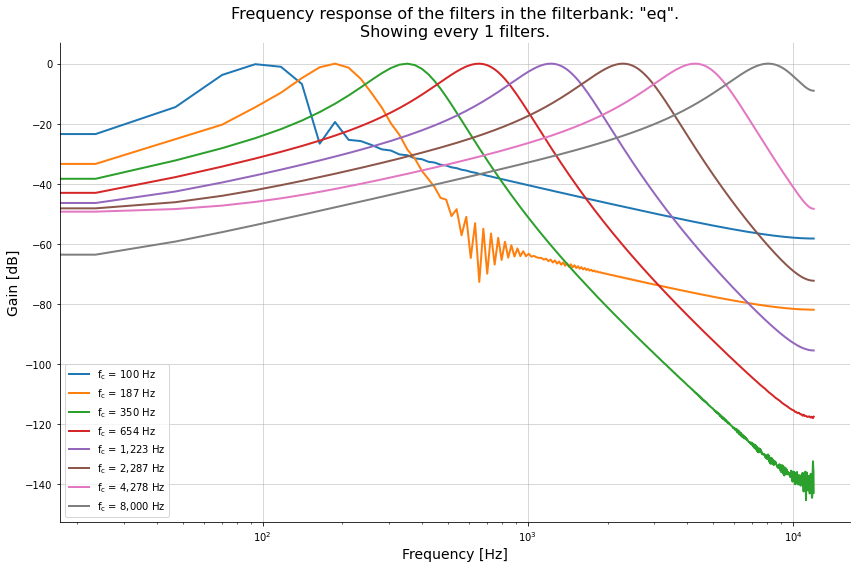

In [29]:
dhasp.show_filterbank_responses('eq', show_every=1)

Let's also view the total (summed) response:

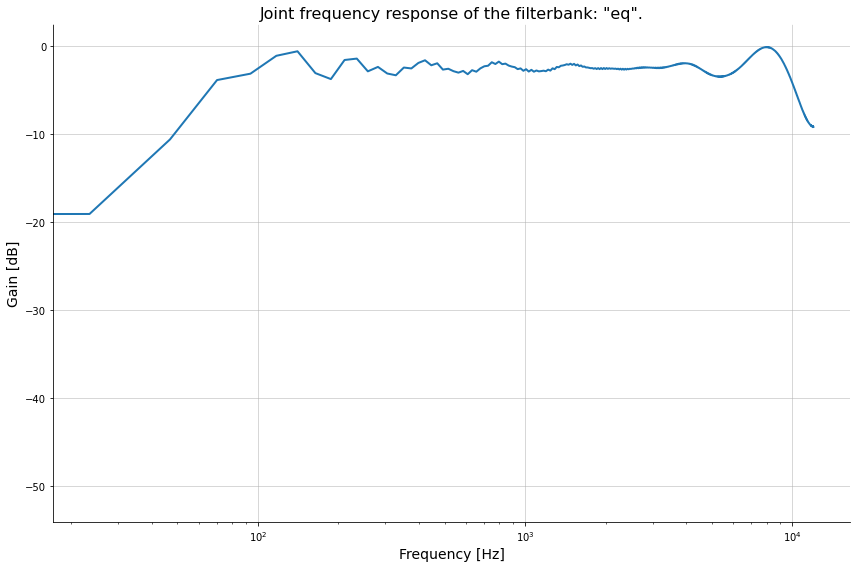

In [30]:
dhasp.show_filterbank_joint_response('eq')

Tt looks like our code is doing what it should.

Having defined the filters, we can now assign a gain $g_i$ to each frequency band, apply the modified filter it to a speech signal $\mathbf{x_i}$, and feed the result to our neural network in order to optimize the gains $g_i$ for best speech intelligibility by minimizing the loss function $L$:

$$
G_{\text{optimized}} = \underset{G}{\text{argmin}} L \left( f(G, X), Y \right)
$$

where: $L$ is the loss function which we will define in the following chapters, $ G = \left\{ {g_1, g_2, \cdots, g_8}  \right\}$ a matrix containing the gains for our EQ, $X = \left\{ \mathbf{x_1}, \mathbf{x_2}, \cdots  \right}$  matrix in which each row represents an speech signal, and $Y = \left\{ \mathbf{y_1}, \mathbf{y_2}, \cdots  \right}$ a matrix where each row represents a corresponding target (clear) speech signal. $f(G, \mathbf{x})$ represents a speech signal after having been fitered with our EQ, i.e.:

$$
\begin{align}
f(G, x)
&= \text{conv} \left(  G  \mathbf{h_{\text{eq}}}, \mathbf{x}  \right) \\
&= \text{conv} \left(  \sum_i g_i \mathbf{h_{\text{eq}}^{(i)}}, \mathbf{x}  \right)
\end{align}
$$

## The auditory model

The structure of the auditory model is shown in Figure XXX. The input signal first goes through two filterbanks: an analysis filterbank and a control filterbank, both consisting of 32 bandpass filters with varying properties. Based on the output of the control fliterbank, a dynamic-range compression gain is calculated for frequency band and applied to the outputs of the filters in the analysis filterbank. The output of the auditory model is then calculated as amplitude envelopes (in dB) of the compressed outputs of the filters in the analysis filterbank.

<center>
<br>
<img src="resources/graphics/dhasp_differentiable_auditory_model.jpg"
alt="DHASP framework as proposed by its creators"
title="Original DHASP framework"
width="600"/>
<br>
</center>

### The filterbanks

The coefficients of the filterbanks in the auditory model are calculated in the same way as the coefficients for the EQ applied to the noisy signal described in section XXX, i.e.:

$$
\mathbf{h}[n] =
c_{\text{norm}}^{(i)}
\left(  \frac {n} {f_s}  \right) ^ {(N - 1)}
\exp \left(  -2 \pi b^{(i)} \frac {n} {f}  \right)
\cos \left(  2 \pi f  \frac {n} {f_s}   \right)
$$


#### Center frequencies


In the **analysis** filterbank, the center frequencies are in the Mel scale and cover the e range from 80 Hz to 8 kHz. To calculate them, I have created functions that convert Hz to Mel and vice versa. The computation is then conducted as follows:

In [12]:
# Define the number of filters: I.
I = 32

# Calculate the frequencies for the analysis filterbank.
f_a = t.dsp.mel2hz(torch.linspace(
    t.dsp.hz2mel(80),
    t.dsp.hz2mel(8000),
    I
)).reshape(I, 1)

# Show the first 3 and last 3 frequencies.
print(f'{f_a[:3, :]=}')
print(f'{f_a[-3:, :]=}')

f_a[:3, :]=tensor([[ 80.0000],
        [143.1066],
        [211.3189]], dtype=torch.float64)
f_a[-3:, :]=tensor([[6746.3509],
        [7348.8016],
        [7999.9987]], dtype=torch.float64)



In the **control** filterbank, the center frequencies are given by equation 3 in the [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571).

$$
f_{\text{c}}^{(i)} =
165.4
\left(
    10^{
        (1 + s)
        \log_{10}
        \left( 1 + f_{\text{a}}^{(i)} / 165.4 \right)
        }
    - 1
\right)
$$

Here, I have corrected a mistake in the paper, where $f_{\text{a}}$ was replaced by $f_{\text{c}}$.

#### Bandwidths

The bandwidths of the **analysis** filterbank are in the equivalent rectangular bandwidth (ERB) scale for the normal hearing model. The formula for calculating the ERB for a given frequency is taken from the paper: [Suggested formulae for calculating auditory-filter bandwidths and excitation patterns](https://pubmed.ncbi.nlm.nih.gov/6630731/). I have implemented the formula in the function `erb`, so that the bandwidths can be calculated as:

In [14]:
# Calculate the bandwidths for the analysis filterbank.
b_a = t.dsp.erb(f_a)

# Show the first 3 and last 3 bandwidths.
print(f'{f_a[:3, :]=}')
print(f'{f_a[-3:, :]=}')

f_a[:3, :]=tensor([[ 80.0000],
        [143.1066],
        [211.3189]], dtype=torch.float64)
f_a[-3:, :]=tensor([[6746.3509],
        [7348.8016],
        [7999.9987]], dtype=torch.float64)


The bandwidth for the control filters is derived from equation 2 in [DHASP article](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9414571) by setting $attn_o = 50$, resulting in

$$
b_c = 4 b_a
$$

We can now test whether our implementation of the filters has been correct. The test of all filters can be done by running the the command

`
import tests.test_dhasp_filters
`

To save space, we will o

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


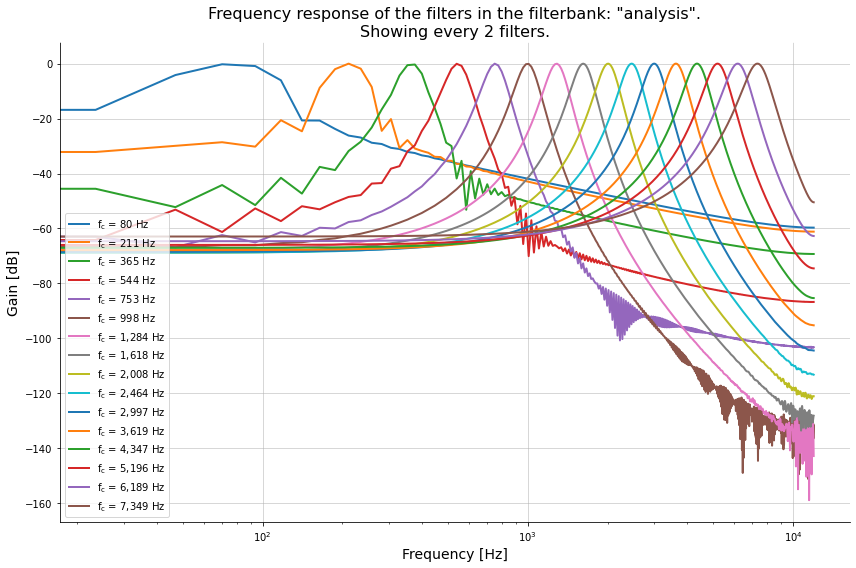

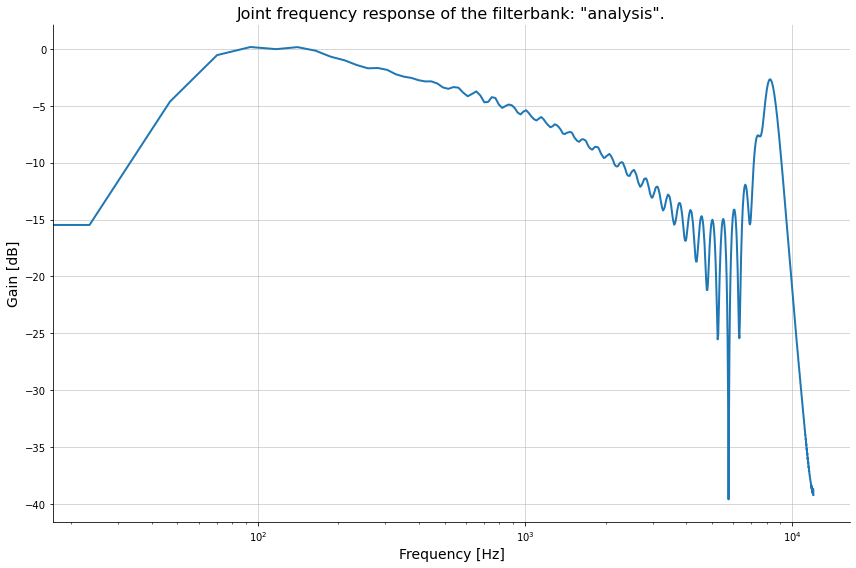

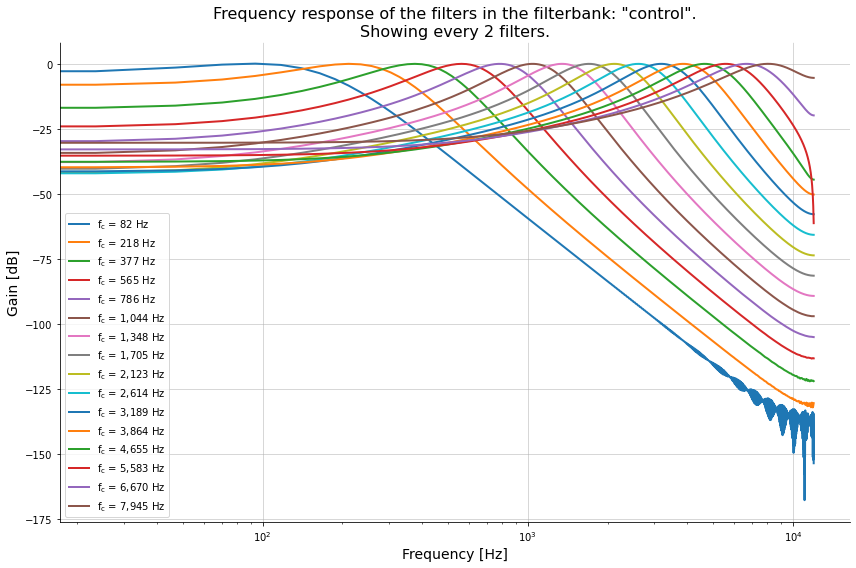

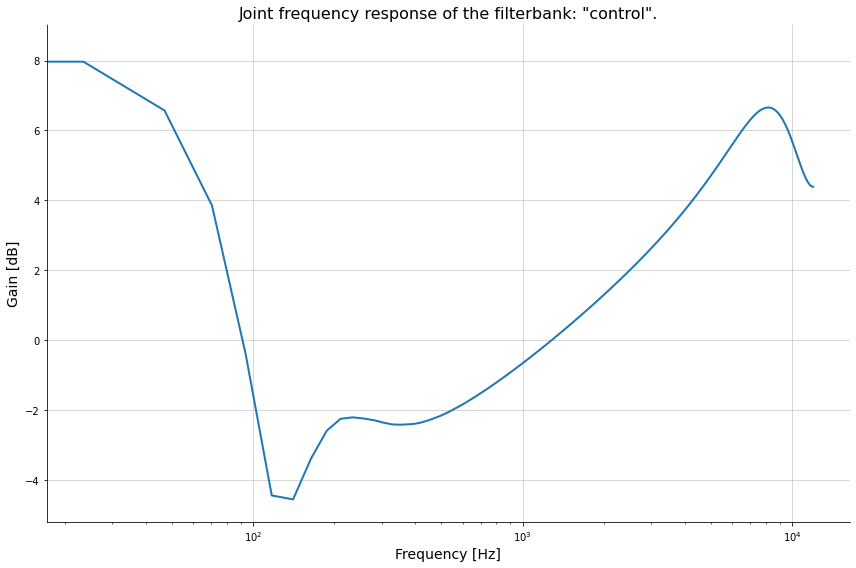

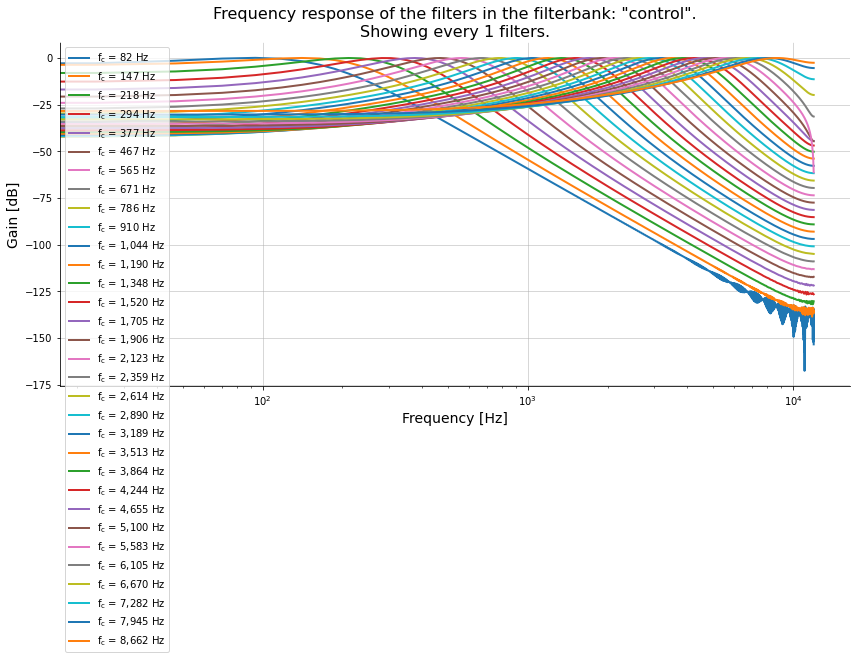

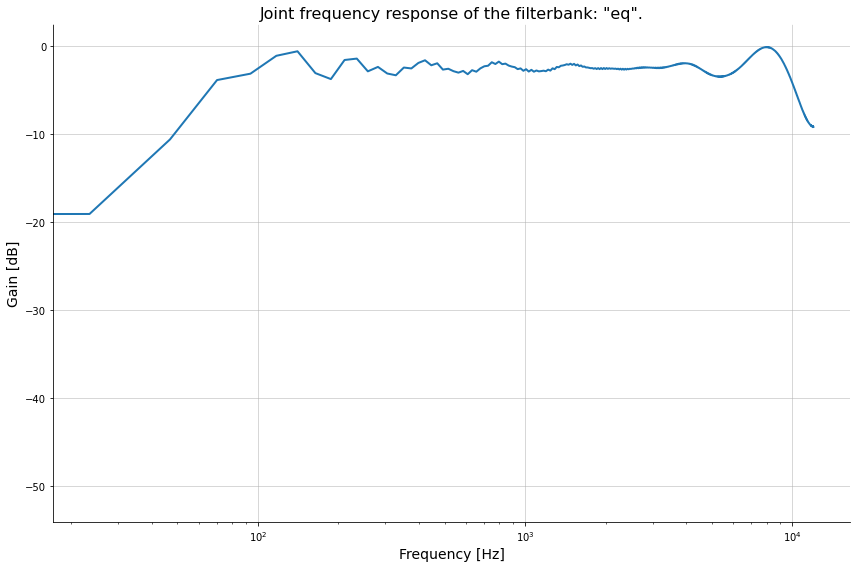

In [1]:
import tests.test_dhasp_filters

# End